In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 3 mins
H2O_cluster_timezone:,Europe/Kiev
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 6 days
H2O_cluster_name:,H2O_from_python_ogurb_h2hs8v
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.289 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


In [2]:
df = h2o.import_file('yield_reg_df.csv', header=1)

print(df.shape)
print(df.columns[:5], df.columns[-5:])
df.head(2)

Parse progress: |███████████████████████████████████████████████████████████████████████████| (done) 100%
(59291, 8201)
['YIELD_numeric', 'REACTIONID', 'preparatory_1', 'preparatory_2', 'preparatory_3'] ['REAGENTSMI3-ECFP4-2043', 'REAGENTSMI3-ECFP4-2044', 'REAGENTSMI3-ECFP4-2045', 'REAGENTSMI3-ECFP4-2046', 'REAGENTSMI3-ECFP4-2047']


YIELD_numeric,REACTIONID,preparatory_1,preparatory_2,preparatory_3,contributor,catalyst_1,catalyst_2,catalyst_3,SMILES-ECFP4-0,SMILES-ECFP4-1,SMILES-ECFP4-2,SMILES-ECFP4-3,SMILES-ECFP4-4,SMILES-ECFP4-5,SMILES-ECFP4-6,SMILES-ECFP4-7,SMILES-ECFP4-8,SMILES-ECFP4-9,SMILES-ECFP4-10,SMILES-ECFP4-11,SMILES-ECFP4-12,SMILES-ECFP4-13,SMILES-ECFP4-14,SMILES-ECFP4-15,SMILES-ECFP4-16,SMILES-ECFP4-17,SMILES-ECFP4-18,SMILES-ECFP4-19,SMILES-ECFP4-20,SMILES-ECFP4-21,SMILES-ECFP4-22,SMILES-ECFP4-23,SMILES-ECFP4-24,SMILES-ECFP4-25,SMILES-ECFP4-26,SMILES-ECFP4-27,SMILES-ECFP4-28,SMILES-ECFP4-29,SMILES-ECFP4-30,SMILES-ECFP4-31,SMILES-ECFP4-32,SMILES-ECFP4-33,SMILES-ECFP4-34,SMILES-ECFP4-35,SMILES-ECFP4-36,SMILES-ECFP4-37,SMILES-ECFP4-38,SMILES-ECFP4-39,SMILES-ECFP4-40,SMILES-ECFP4-41,SMILES-ECFP4-42,SMILES-ECFP4-43,SMILES-ECFP4-44,SMILES-ECFP4-45,SMILES-ECFP4-46,SMILES-ECFP4-47,SMILES-ECFP4-48,SMILES-ECFP4-49,SMILES-ECFP4-50,SMILES-ECFP4-51,SMILES-ECFP4-52,SMILES-ECFP4-53,SMILES-ECFP4-54,SMILES-ECFP4-55,SMILES-ECFP4-56,SMILES-ECFP4-57,SMILES-ECFP4-58,SMILES-ECFP4-59,SMILES-ECFP4-60,SMILES-ECFP4-61,SMILES-ECFP4-62,SMILES-ECFP4-63,SMILES-ECFP4-64,SMILES-ECFP4-65,SMILES-ECFP4-66,SMILES-ECFP4-67,SMILES-ECFP4-68,SMILES-ECFP4-69,SMILES-ECFP4-70,SMILES-ECFP4-71,SMILES-ECFP4-72,SMILES-ECFP4-73,SMILES-ECFP4-74,SMILES-ECFP4-75,SMILES-ECFP4-76,SMILES-ECFP4-77,SMILES-ECFP4-78,SMILES-ECFP4-79,SMILES-ECFP4-80,SMILES-ECFP4-81,SMILES-ECFP4-82,SMILES-ECFP4-83,SMILES-ECFP4-84,SMILES-ECFP4-85,SMILES-ECFP4-86,SMILES-ECFP4-87,SMILES-ECFP4-88,SMILES-ECFP4-89,SMILES-ECFP4-90,SMILES-ECFP4-91,SMILES-ECFP4-92,SMILES-ECFP4-93,SMILES-ECFP4-94,SMILES-ECFP4-95,SMILES-ECFP4-96,SMILES-ECFP4-97,SMILES-ECFP4-98,SMILES-ECFP4-99,SMILES-ECFP4-100,SMILES-ECFP4-101,SMILES-ECFP4-102,SMILES-ECFP4-103,SMILES-ECFP4-104,SMILES-ECFP4-105,SMILES-ECFP4-106,SMILES-ECFP4-107,SMILES-ECFP4-108,SMILES-ECFP4-109,SMILES-ECFP4-110,SMILES-ECFP4-111,SMILES-ECFP4-112,SMILES-ECFP4-113,SMILES-ECFP4-114,SMILES-ECFP4-115,SMILES-ECFP4-116,SMILES-ECFP4-117,SMILES-ECFP4-118,SMILES-ECFP4-119,SMILES-ECFP4-120,SMILES-ECFP4-121,SMILES-ECFP4-122,SMILES-ECFP4-123,SMILES-ECFP4-124,SMILES-ECFP4-125,SMILES-ECFP4-126,SMILES-ECFP4-127,SMILES-ECFP4-128,SMILES-ECFP4-129,SMILES-ECFP4-130,SMILES-ECFP4-131,SMILES-ECFP4-132,SMILES-ECFP4-133,SMILES-ECFP4-134,SMILES-ECFP4-135,SMILES-ECFP4-136,SMILES-ECFP4-137,SMILES-ECFP4-138,SMILES-ECFP4-139,SMILES-ECFP4-140,SMILES-ECFP4-141,SMILES-ECFP4-142,SMILES-ECFP4-143,SMILES-ECFP4-144,SMILES-ECFP4-145,SMILES-ECFP4-146,SMILES-ECFP4-147,SMILES-ECFP4-148,SMILES-ECFP4-149,SMILES-ECFP4-150,SMILES-ECFP4-151,SMILES-ECFP4-152,SMILES-ECFP4-153,SMILES-ECFP4-154,SMILES-ECFP4-155,SMILES-ECFP4-156,SMILES-ECFP4-157,SMILES-ECFP4-158,SMILES-ECFP4-159,SMILES-ECFP4-160,SMILES-ECFP4-161,SMILES-ECFP4-162,SMILES-ECFP4-163,SMILES-ECFP4-164,SMILES-ECFP4-165,SMILES-ECFP4-166,SMILES-ECFP4-167,SMILES-ECFP4-168,SMILES-ECFP4-169,SMILES-ECFP4-170,SMILES-ECFP4-171,SMILES-ECFP4-172,SMILES-ECFP4-173,SMILES-ECFP4-174,SMILES-ECFP4-175,SMILES-ECFP4-176,SMILES-ECFP4-177,SMILES-ECFP4-178,SMILES-ECFP4-179,SMILES-ECFP4-180,SMILES-ECFP4-181,SMILES-ECFP4-182,SMILES-ECFP4-183,SMILES-ECFP4-184,SMILES-ECFP4-185,SMILES-ECFP4-186,SMILES-ECFP4-187,SMILES-ECFP4-188,SMILES-ECFP4-189,SMILES-ECFP4-190
30.4,20,4,3,1,0,5,2,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80,20,4,3,1,0,5,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [3]:
%%time

y = "YIELD_numeric"
x = list(df.columns)
x.remove(y)

df['REACTIONID'] = df['REACTIONID'].asfactor()
df['preparatory_1'] = df['preparatory_1'].asfactor()
df['preparatory_2'] = df['preparatory_2'].asfactor()
df['preparatory_3'] = df['preparatory_3'].asfactor()
df['contributor'] = df['contributor'].asfactor()
df['catalyst_1'] = df['catalyst_1'].asfactor()
df['catalyst_2'] = df['catalyst_2'].asfactor()
df['catalyst_3'] = df['catalyst_3'].asfactor()

# for i in x:
#     df[i] = df[i].asfactor() 

aml_bin_clf = H2OAutoML(nfolds=5,
                        balance_classes=True,
                        max_runtime_secs_per_model=180,
                        stopping_rounds=50,
                        keep_cross_validation_fold_assignment=True,
                        project_name='YIELD_numeric',
                        seed=1)

aml_bin_clf.train(x=x,
                  y=y,
                  training_frame=df)

model_path = h2o.save_model(model=aml_bin_clf.get_best_model(),
                            path="trained_models/yield_reg_best_model",
                            force=True)

print(f'The best model was saved: {model_path}')

model_ids = list(aml_bin_clf.leaderboard['model_id'].as_data_frame().iloc[:,0])
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
metalearner = h2o.get_model(se.metalearner()['name'])
metalearner_path = h2o.save_model(model=metalearner,
                            path="trained_models/yield_reg_metalearner",
                            force=True)

print(f'The metalearner was saved: {metalearner_path}')

AutoML progress: |
18:03:48.525: _train param, Dropping bad and constant columns: [REAGENTSMI3-ECFP4-1225, REAGENTSMI3-ECFP4-1346, REAGENTSMI3-ECFP4-144, REAGENTSMI3-ECFP4-1227, REAGENTSMI3-ECFP4-1228, REAGENTSMI3-ECFP4-1221, REAGENTSMI3-ECFP4-1222, REAGENTSMI3-ECFP4-940, REAGENTSMI3-ECFP4-1102, REAGENTSMI3-ECFP4-1223, REAGENTSMI3-ECFP4-1462, REAGENTSMI3-ECFP4-1583, REAGENTSMI3-ECFP4-263, REAGENTSMI3-ECFP4-261, REAGENTSMI3-ECFP4-825, REAGENTSMI3-ECFP4-945, REAGENTSMI3-ECFP4-943, REAGENTSMI3-ECFP4-708, REAGENTSMI3-ECFP4-1207, REAGENTSMI3-ECFP4-827, REAGENTSMI3-ECFP4-705, REAGENTSMI3-ECFP4-1214, REAGENTSMI3-ECFP4-1335, REAGENTSMI3-ECFP4-155, REAGENTSMI3-ECFP4-397, REAGENTSMI3-ECFP4-1337, REAGENTSMI3-ECFP4-1458, REAGENTSMI3-ECFP4-1579, REAGENTSMI3-ECFP4-17, REAGENTSMI3-ECFP4-830, REAGENTSMI3-ECFP4-1213, REAGENTSMI3-ECFP4-1690, REAGENTSMI3-ECFP4-390, REAGENTSMI3-ECFP4-1692, REAGENTSMI3-ECFP4-274, REAGENTSMI3-ECFP4-10, REAGENTSMI3-ECFP4-273, REAGENTSMI3-ECFP4-393, REAGENTSMI3-ECFP4-1916, RE

/Users/ogurb/miniconda3/lib/python3.8/site-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


# Analysis

AttributeError: 'Line2D' object has no attribute '_legmarker'

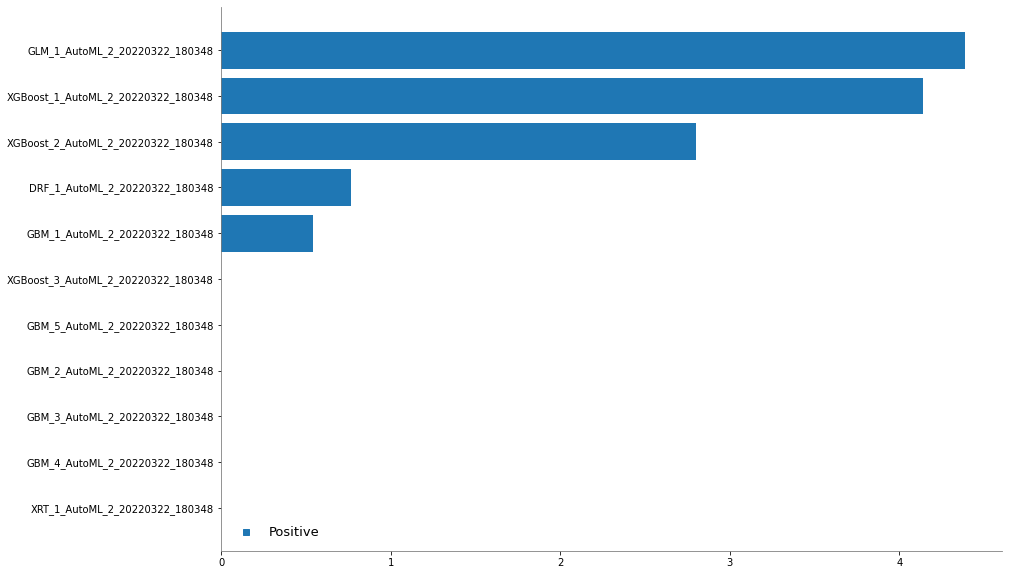

In [4]:
metalearner.std_coef_plot()

In [5]:
metalearner._model_json['output']


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,"Elastic Net (alpha = 0.5, lambda = 0.2216 )",11,5,1,levelone_training_StackedEnsemble_AllModels_2_AutoML_2_20220322_18...



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_xval,deviance_se,training_rmse,training_deviance,training_mae,training_r2
0,,2022-03-22 18:44:12,0.000 sec,1,1.313861e+07,221.883903,1.0,0.221642,443.190775,443.245757,198.251384,21.051949,443.184547,16.012,0.218132



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-22 18:44:12,0.000 sec,1,1.052120e+07,177.731861,1.0,0.221642,443.698547,441.256377,21.063942,443.689635,16.021821,0.216189,21.006103,441.256377,15.949702,0.225671



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-22 18:44:12,0.000 sec,1,1.050901e+07,177.532238,1.0,0.221642,443.165819,443.321846,21.051284,443.156549,16.005169,0.219147,21.055209,443.321846,16.029339,0.214003



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-22 18:44:12,0.000 sec,1,1.052619e+07,177.825625,1.0,0.221642,444.978665,436.134125,21.094295,444.969299,16.048572,0.218371,20.883824,436.134125,15.912297,0.217106



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-22 18:44:12,0.000 sec,1,1.055151e+07,178.248204,1.0,0.221642,443.900286,440.350144,21.068726,443.891211,16.041677,0.218106,20.984522,440.350144,15.904039,0.218164



Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,alpha,lambda,deviance_train,deviance_test,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-03-22 18:44:12,0.000 sec,1,1.044647e+07,176.476707,1.0,0.221642,440.212733,455.166293,20.981029,440.203597,15.940539,0.218865,21.334627,455.166293,16.267898,0.215135



Node Information: 


,,node,h2o,healthy,last_ping,num_cpus,sys_load,mem_value_size,free_mem,pojo_mem,...,rpcs_active,nthreads,is_leader,total_mem,max_mem,java_version,jvm_launch_parameters,os_version,machine_physical_mem,machine_locale
0,,0,127.0.0.1:54321,true,1647967451506,10,21.870117,277253743.0,3.375756e+09,641957962.0,..., ,10,true,3.726639e+09,4.294967e+09,Java 16.0.2 (from Homebrew),[-ea],Mac OS X 12.3 (x86_64),1.717987e+10,en_UA



Cluster Configuration: 


,,h2o_cluster_uptime,h2o_cluster_timezone,h2o_data_parsing_timezone,h2o_cluster_version,h2o_cluster_version_age,h2o_cluster_name,h2o_cluster_total_nodes,h2o_cluster_free_memory,h2o_cluster_total_cores,h2o_cluster_allowed_cores,h2o_cluster_status,h2o_internal_security,h2o_api_extensions
0,,6255602.0,Europe/Kiev,UTC,3.36.0.3,1 month and 6 days,H2O_from_python_ogurb_h2hs8v,1,3.375756e+09,10,10,"locked, healthly",false,"Amazon S3, XGBoost, Algos, Infogram, AutoML, Core V3, TargetEncode..."



Input Frames Information: 


,,input_frame,checksum,espc
0,,training_frame,1.204866e+18,"[0, 1473, 2955, 4438, 5920, 7403, 8886, 10368, 11851, 13334, 14816..."
1,,validation_frame,-1.000000e+00,-1



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 443.1845474995585
RMSE: 21.051948781515655
MAE: 16.011999600577543
RMSLE: NaN
R^2: 0.21813175826976194
Mean Residual Deviance: 443.1845474995585
Null degrees of freedom: 59290
Residual degrees of freedom: 59285
Null deviance: 33607778.91124833
Residual deviance: 26276855.005796324
AIC: 529593.1090242115

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 443.23045923640086
RMSE: 21.053039192392173
MAE: 16.01251726170652
RMSLE: NaN
R^2: 0.2180507605699039
Mean Residual Deviance: 443.23045923640086
Null degrees of freedom: 59290
Residual degrees of freedom: 59285
Null deviance: 33608586.245996915
Residual deviance: 26279577.158585444
AIC: 529599.250961726

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,1.601265e+01,0.151046,1.594970e+01,1.602934e+01,1.591230e+01,1.590404e+01,1.626790e+01
1,mean_residual_deviance,4.432458e+02,7.159303,4.412564e+02,4.433218e+02,4.361341e+02,4.403502e+02,4.551663e+02
2,mse,4.432458e+02,7.159303,4.412564e+02,4.433218e+02,4.361341e+02,4.403502e+02,4.551663e+02
3,null_deviance,6.721717e+06,93474.310000,6.762076e+06,6.691594e+06,6.674480e+06,6.618773e+06,6.861663e+06
4,r2,2.180157e-01,0.004579,2.256710e-01,2.140028e-01,2.171061e-01,2.181635e-01,2.151350e-01
5,residual_deviance,5.255916e+06,78355.880000,5.235948e+06,5.259570e+06,5.224887e+06,5.174554e+06,5.384617e+06
6,rmse,2.105286e+01,0.169431,2.100610e+01,2.105521e+01,2.088383e+01,2.098452e+01,2.133463e+01
7,rmsle,NaN,0.000000,NaN,NaN,NaN,NaN,NaN



Coefficients: glm coefficients


,names,coefficients,standardized_coefficients
0,Intercept,-9.769826,31.130912
1,GLM_1_AutoML_2_20220322_180348,0.439301,4.386756
2,XGBoost_1_AutoML_2_20220322_180348,0.376894,4.136557
3,XGBoost_2_AutoML_2_20220322_180348,0.280318,2.802941
4,XGBoost_3_AutoML_2_20220322_180348,0.000000,0.000000
5,GBM_5_AutoML_2_20220322_180348,0.000000,0.000000
6,GBM_2_AutoML_2_20220322_180348,0.000000,0.000000
7,GBM_3_AutoML_2_20220322_180348,0.000000,0.000000
8,GBM_1_AutoML_2_20220322_180348,0.169845,0.543011
9,GBM_4_AutoML_2_20220322_180348,0.000000,0.000000



Standardized Coefficient Magnitudes: standardized coefficient magnitudes


,names,coefficients,sign
0,GLM_1_AutoML_2_20220322_180348,4.386756,POS
1,XGBoost_1_AutoML_2_20220322_180348,4.136558,POS
2,XGBoost_2_AutoML_2_20220322_180348,2.802941,POS
3,DRF_1_AutoML_2_20220322_180348,0.766382,POS
4,GBM_1_AutoML_2_20220322_180348,0.543011,POS
5,XGBoost_3_AutoML_2_20220322_180348,0.000000,POS
6,GBM_5_AutoML_2_20220322_180348,0.000000,POS
7,GBM_2_AutoML_2_20220322_180348,0.000000,POS
8,GBM_3_AutoML_2_20220322_180348,0.000000,POS
9,GBM_4_AutoML_2_20220322_180348,0.000000,POS



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,GLM_1_AutoML_2_20220322_180348,4.386756,1.000000,0.347173
1,XGBoost_1_AutoML_2_20220322_180348,4.136558,0.942965,0.327372
2,XGBoost_2_AutoML_2_20220322_180348,2.802941,0.638955,0.221828
3,DRF_1_AutoML_2_20220322_180348,0.766382,0.174704,0.060652
4,GBM_1_AutoML_2_20220322_180348,0.543011,0.123784,0.042975
5,XGBoost_3_AutoML_2_20220322_180348,0.000000,0.000000,0.000000
6,GBM_5_AutoML_2_20220322_180348,0.000000,0.000000,0.000000
7,GBM_2_AutoML_2_20220322_180348,0.000000,0.000000,0.000000
8,GBM_3_AutoML_2_20220322_180348,0.000000,0.000000,0.000000
9,GBM_4_AutoML_2_20220322_180348,0.000000,0.000000,0.000000


{'__meta': {'schema_version': 3,
  'schema_name': 'GLMModelOutputV3',
  'schema_type': 'GLMOutput'},
 'names': ['GLM_1_AutoML_2_20220322_180348',
  'XGBoost_1_AutoML_2_20220322_180348',
  'XGBoost_2_AutoML_2_20220322_180348',
  'XGBoost_3_AutoML_2_20220322_180348',
  'GBM_5_AutoML_2_20220322_180348',
  'GBM_2_AutoML_2_20220322_180348',
  'GBM_3_AutoML_2_20220322_180348',
  'GBM_1_AutoML_2_20220322_180348',
  'GBM_4_AutoML_2_20220322_180348',
  'XRT_1_AutoML_2_20220322_180348',
  'DRF_1_AutoML_2_20220322_180348',
  'YIELD_numeric'],
 'original_names': None,
 'column_types': ['Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric',
  'Numeric'],
 'domains': [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 'cross_validation_models': None,
 'cross_validation_predictions': None,
 'cross_validation_holdout_predictions_frame_id': None,
 'cross_validation_fold_ass

In [6]:
leaderboard = aml_bin_clf.leaderboard
leaderboard.head(10)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_2_AutoML_2_20220322_180348,443.23,21.053,443.23,16.0125,nan
StackedEnsemble_AllModels_1_AutoML_2_20220322_180348,443.289,21.0544,443.289,16.0135,nan
StackedEnsemble_BestOfFamily_1_AutoML_2_20220322_180348,446.416,21.1286,446.416,16.0824,nan
StackedEnsemble_BestOfFamily_2_AutoML_2_20220322_180348,446.604,21.133,446.604,16.0742,nan
StackedEnsemble_BestOfFamily_3_AutoML_2_20220322_180348,446.647,21.134,446.647,16.0704,nan
GLM_1_AutoML_2_20220322_180348,463.864,21.5375,463.864,16.4432,nan
XGBoost_1_AutoML_2_20220322_180348,465.654,21.579,465.654,16.3308,nan
XGBoost_2_AutoML_2_20220322_180348,470.203,21.6842,470.203,16.4402,0.768871
XGBoost_3_AutoML_2_20220322_180348,485.76,22.04,485.76,16.8248,0.785943
GBM_5_AutoML_2_20220322_180348,509.414,22.5702,509.414,17.3106,0.809072
